# SciPy Samples

module installation

In [1]:
!pip3 install matplotlib

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [2]:
!sudo apt-get install python3-scipy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-scipy is already the newest version (1.1.0-7).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


library import 

In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats

curve fitting on semirandom data implementation 

In [27]:
def test_func(x, a, b):
#     return a * np.sin(b * x)
    return a * np.cos(b * x)

seeding the random number generator

In [28]:
np.random.seed(0)

points generation

In [29]:
x_data = np.linspace(-5, 5, num = 50)
y_data = 14 * np.sin(1.5 * x_data) + np.random.normal(size=50)

params, covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])

plot the values finally

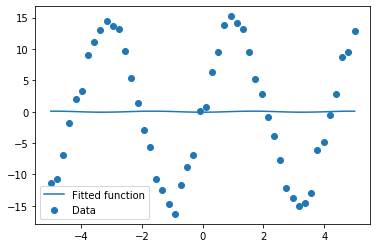

In [30]:
plt.figure(figsize=[6, 4])
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function')

plt.legend(loc='best')
plt.show()

### Interpolation for missing data

- For interpolation,
    - a series of data point at descrete location
    - we want to estimate data points between 
- Can interpolate linearly between a given function
    - ie, can draw straight line between any two point
    - ... and use to find unkown point, y, given x
    
 To interpolate:
     - given x_values and corresponding y_values
     - ... create an interpolation function using `interp1d` function
         - ie, f_linear = interp1d(x_values, y_values)
     - then, evaluate x anywhere between the bounds of the data
         - using y_i = f_linear(x_i)

In [9]:
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

np.random.seed(0)

sparse data generation

In [42]:
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * ( np.random.random(10) * 2 - 1 )
measures = np.sin(2 * np.pi * measured_time) + noise

interpolate to provide new time point

In [62]:
interpolation_time = np.linspace(0, 1, 10)

linear_interp = interp1d(measured_time, measures)
linear_results = linear_interp(interpolation_time)

cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_result = cubic_interp(interpolation_time)

plot the data and the interpolations

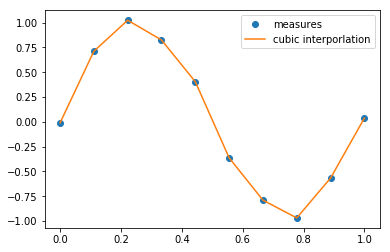

In [63]:
plt.figure(figsize=[6, 4])
plt.plot(measured_time, measures, 'o', ms=6, label='measures') 
plt.plot(interpolation_time, linear_results, label='cubic interporlation')

plt.legend()
plt.show()

## Integration

In [75]:
from scipy.integrate import *

def f(x):
    return (3.0 * x **2 + 1.0)

x_high = 1
x_low = 0

I, err = quad(f, x_low, x_high)

In [76]:
print("I  =  ", I)
print("error  =  ", err)

I  =   2.0
error  =   2.220446049250313e-14
